In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import random
import statistics
import math
import seaborn as sns

In [2]:
n = 25

#### а)

In [3]:
x = np.array([round(random.expovariate(lambd = 1), 2) for i in range(n)])

In [4]:
x = np.sort(x) 
x 

array([0.03, 0.1 , 0.14, 0.21, 0.26, 0.27, 0.28, 0.33, 0.43, 0.43, 0.48,
       0.55, 0.57, 0.66, 0.67, 0.78, 0.82, 0.92, 1.  , 1.15, 1.4 , 1.5 ,
       2.17, 2.33, 5.43])

### Moda

In [5]:
statistics.mode(x)

0.43

### Median

In [6]:
statistics.median(x)

0.57

### Scope

In [7]:
x[n-1] - x[0]

5.3999999999999995

### The coefficient of asymmetry

In [8]:
sps.skew(x, axis=0, bias=False)

3.062251794006342

#### б)

In [9]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lavender'})

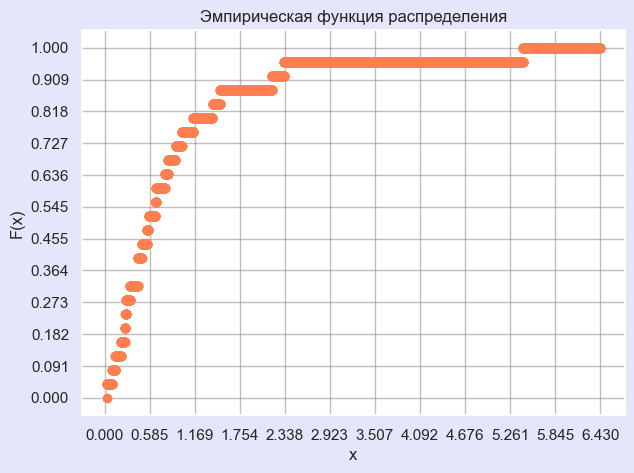

In [10]:
x_line = np.linspace(x[0], x[n-1]+1, 10000)
y = np.array([np.sum(x<i) for i in x_line])/len(x)
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x_line, y, color = 'coral')
ax.set_xticks(np.linspace(0, x_line.max(), 12))
ax.set_yticks(np.linspace(0, y.max(), 12))
ax.set_title('Эмпирическая функция распределения')
ax.set_ylabel('F(x)')
ax.set_xlabel('x')
ax.grid(which='major', alpha = 0.5, color = 'grey') 
#plt.show()

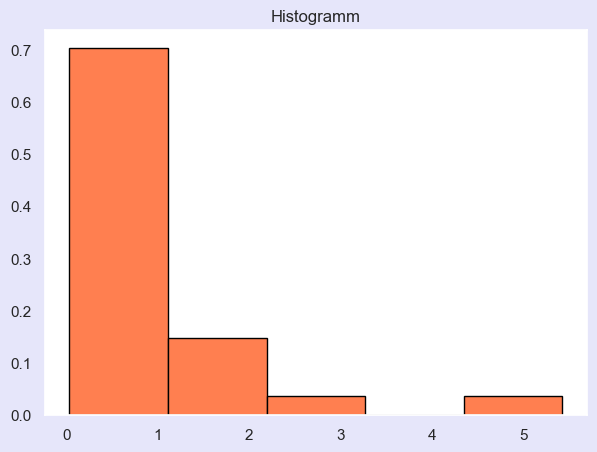

In [13]:
k = 1 + math.log2(n)
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(x, bins = int(k), density=True, histtype='bar', edgecolor='black', color = 'coral') #'bar', 'barstacked', 'step', 'stepfilled'
ax.set_title('Histogramm')
#ax.legend(loc='upper right', shadow=False, framealpha=1, edgecolor='black')
plt.show()

Text(0.5, 0, 'values')

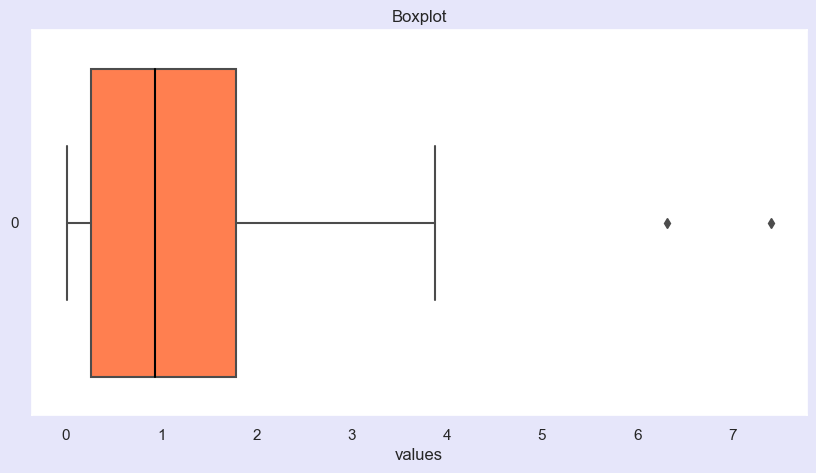

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
bp = sns.boxplot(x, orient='h', boxprops={"facecolor":"coral"},
    medianprops={"color": "black"},)
ax.set_title('Boxplot')
bp.set_xlabel('values')

In [13]:
x_mean = x.mean()
x_mean

1.5560000000000003

### c)

In [14]:
s = np.sqrt(1/(n-1)*np.sum((x-x_mean)**2))
s

1.8571797615380874

In [15]:
h = 2.344*s/(n**0.2)
h

2.286775591146453

In [16]:
def q_func(x, h, x0):
    return 3/4*(1-((x-x0)/h)**2)

#### limits of the total interval

In [17]:
a = x[0] - h
a 

-2.2767755911464533

In [18]:
b = x[24] + h 
b 

9.696775591146453

In [19]:
values = np.linspace(a, b, 10000)

In [20]:
y = np.zeros_like(values)

In [21]:
for i in range(len(x)-1):
    a1 = x[i] - h
    b1 = x[i] + h 
    ind_a = np.where(values >= a1)[0][0]
    ind_b = np.where(values <= b1)[0][-1]
    y[ind_a:ind_b] += q_func(values[ind_a : ind_b], h, x[i])

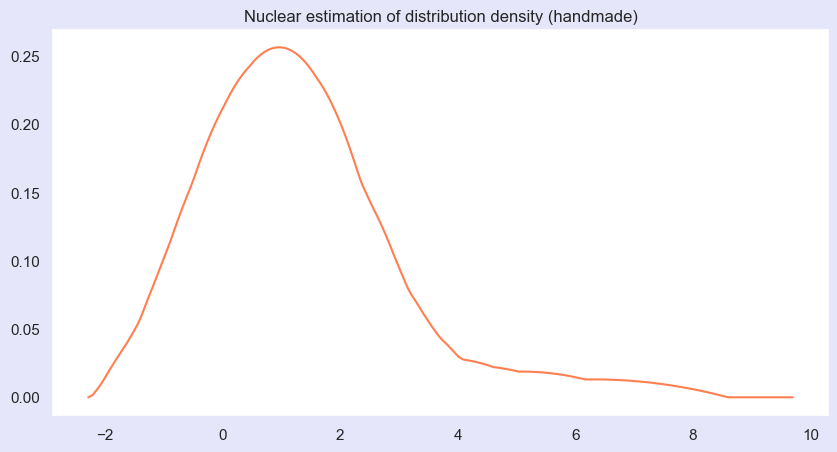

In [22]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Nuclear estimation of distribution density (handmade)')
plt.plot(values,y/(n*h), color = 'coral')

C:\Users\User!!!!!!!!\AppData\Local\Temp\ipykernel_1132\4150234368.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color='coral')


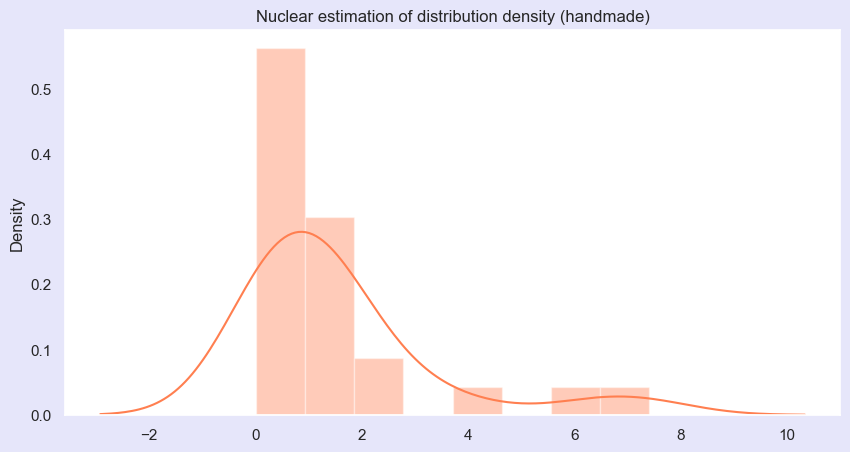

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title('Nuclear estimation of distribution density (handmade)')
sns.distplot(x, color='coral')
plt.show()

### d)

In [24]:
x.mean()

1.5560000000000003

In [25]:
sps.moment(x,1)

0.0

### Bootstrap estimation of the density of the arithmetic mean distribution

In [26]:
boot_means = []
for _ in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_means.append(bootsample.mean())

<AxesSubplot: ylabel='Density'>

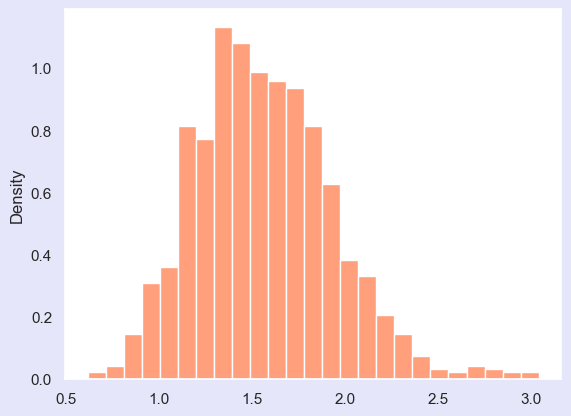

In [27]:
sns.histplot(boot_means, bins = n,  color = 'coral', stat="density")

### e) bootstrap estimation of distribution density coefficient of asymmetry

In [28]:
boot_asym = []
for _ in range(1000):
    bootsample = np.random.choice(x, size=n, replace=True)
    boot_asym.append(sps.skew(bootsample))

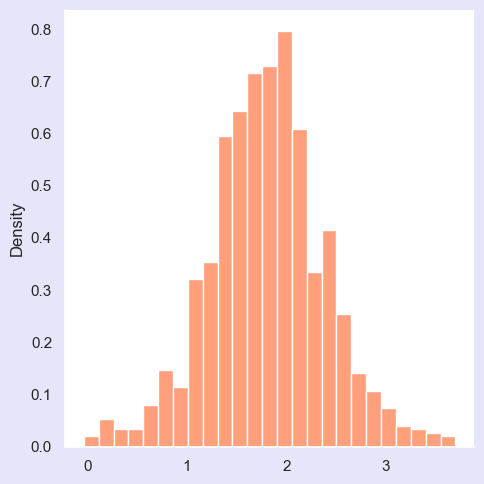

In [29]:
be = sns.displot(boot_asym, bins = n, color = 'coral', stat="density")
#be.fig.suptitle('estimation of distribution')

In [30]:
#sns.distplot(boot_asym, bins = 35, color='coral',
#             hist_kws={"edgecolor": 'white'})